### Парная линейная регрессия
#### Цель работы
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

#### Содержание работы
Загрузить данные из тектовых файлов.  
Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.  
Оценить на графике качество построенной модели.  
Построить кривые обучения.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

In [3]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [4]:
x.shape, y.shape

((20,), (20,))

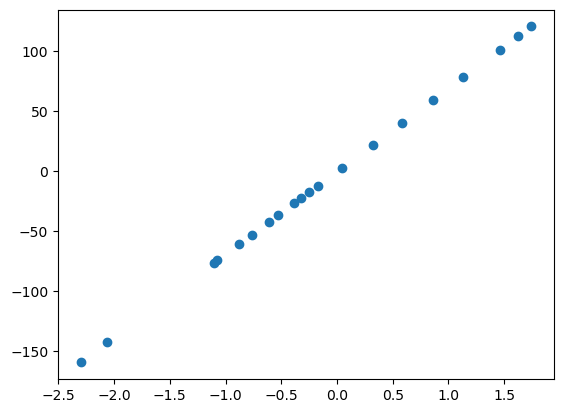

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [6]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(Y)) 
    
    def fit(self, X, Y):  
        alpha = 0.5
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [7]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


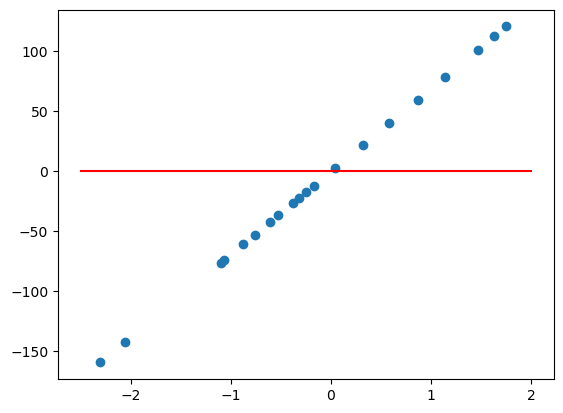

In [8]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [9]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 432.6221263403898


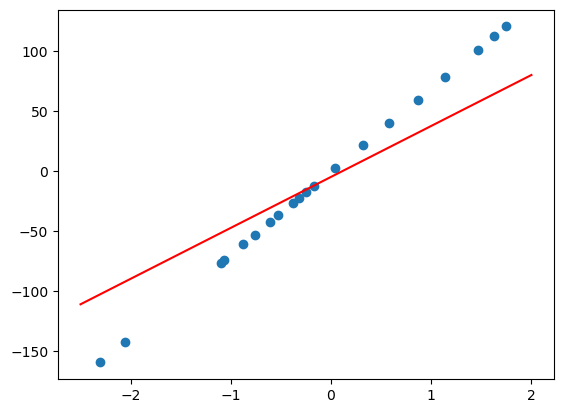

In [10]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [11]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [12]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


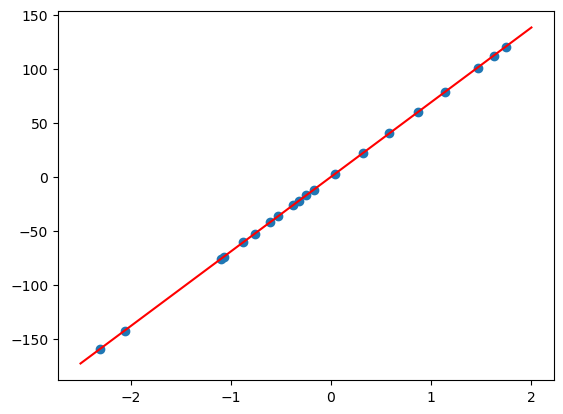

In [13]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

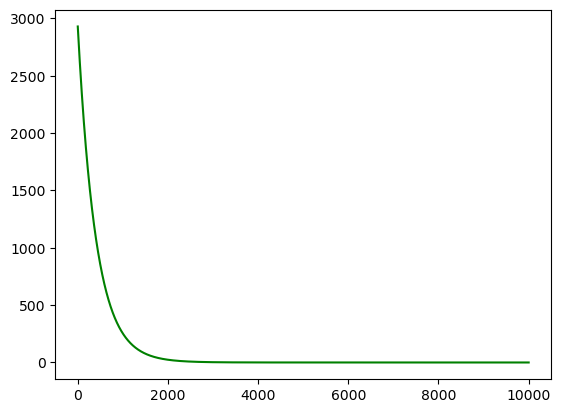

In [14]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Дополнительное

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=10, accuracy=0.01, max_steps=5000):
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(100):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            if new_err > old_err: #для случая, когда мы выпрыгиваем или перепрыгиваем минимум при слишком большом альфа
                alpha /= 2
                self.__init__()
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        return steps, errors

In [16]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.2465009910112536e-15


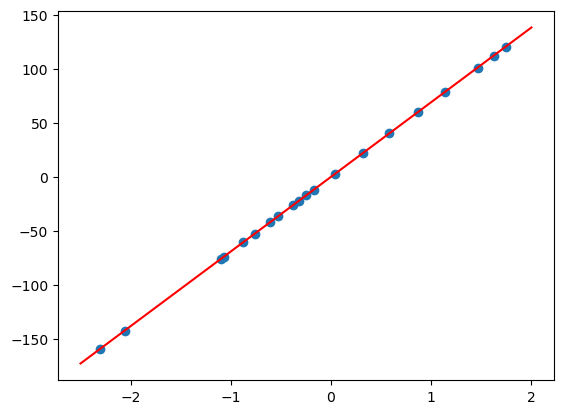

In [17]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

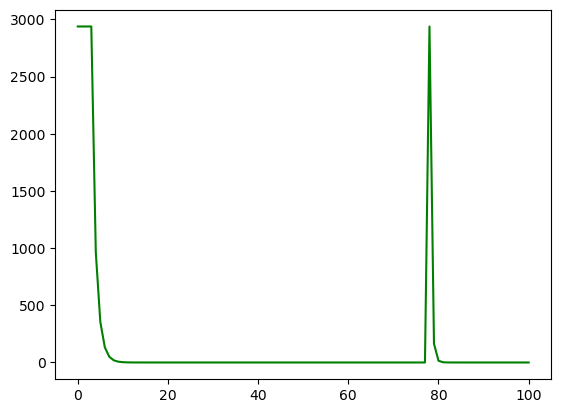

In [18]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [19]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

In [20]:
hyp = Model(max_iter=50000)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.04992531975655815


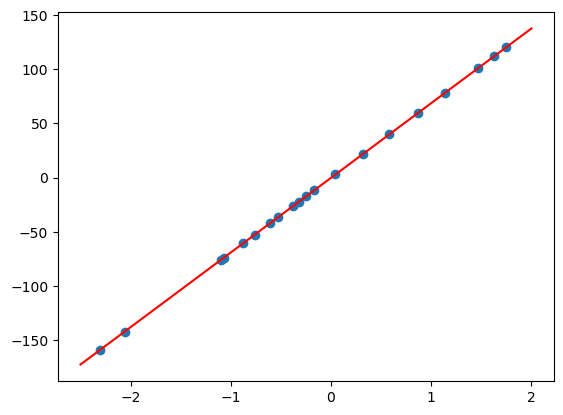

In [21]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

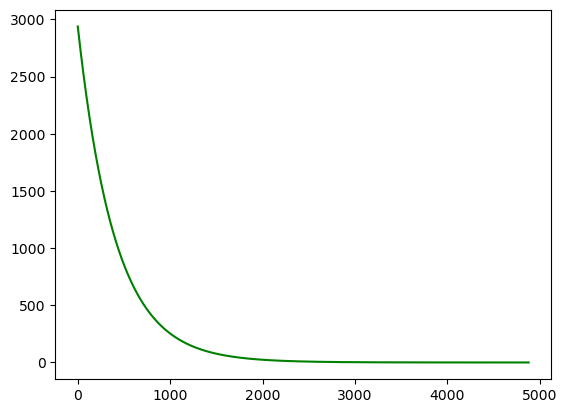

In [22]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### Доп задания

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.  
2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.  
3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.  
4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.  
5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.  
6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.  
7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

##### 1


In [23]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 5
        self.b1 = -10
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [24]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7171557153298706e-06


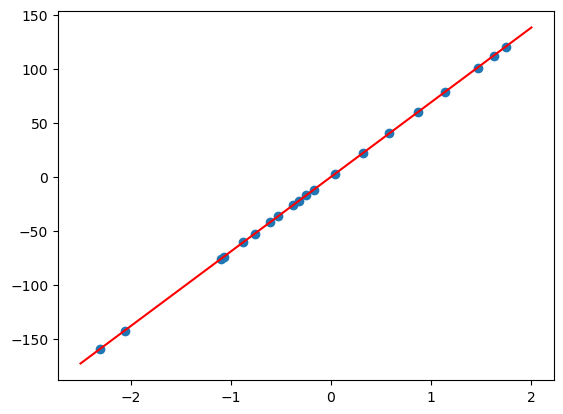

In [25]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

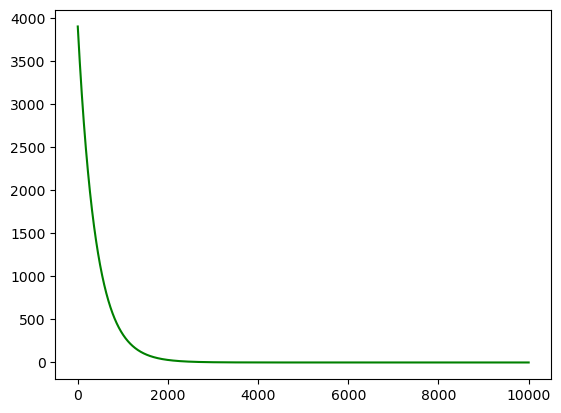

In [26]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 2


In [28]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=2, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(100):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [29]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 1.041980632657617e+43


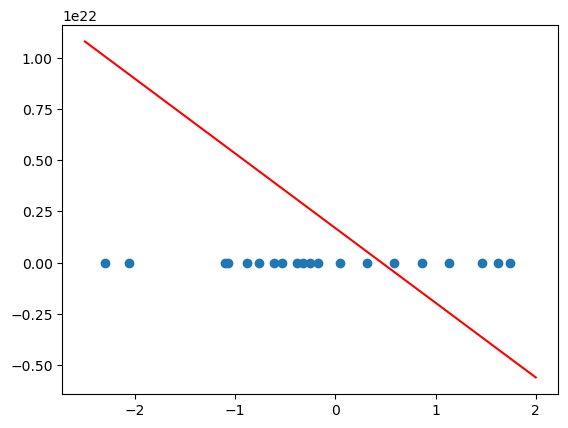

In [30]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

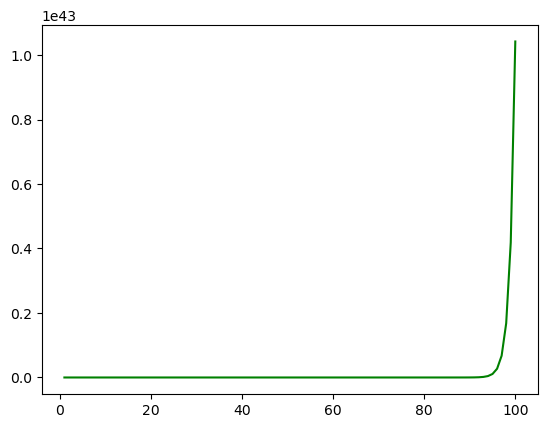

In [31]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 3 ex

In [38]:
df = pd.DataFrame({'x': x, 'y': y})
df[['x']].head()

,x
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def _ensure_numpy(self, X):
        if isinstance(X, (pd.Series, pd.DataFrame)):
            return X.values.flatten()
        return np.asarray(X)

    def predict(self, X):
        X = self._ensure_numpy(X)
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        return np.sum((self.predict(X) - Y) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        
        steps, errors = [], []
        step = 0
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

In [48]:
hyp1 = Model()
steps, errors = hyp1.fit(x, y)
J = hyp1.error(df[['x']], df[['y']])
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


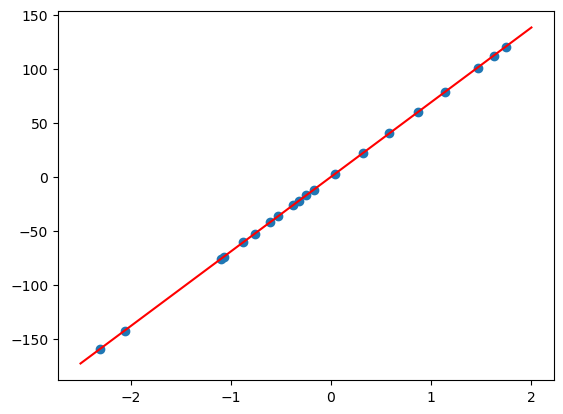

In [49]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp1.predict(X0)
plt.figure()
plt.scatter(df['x'], df['y'])
plt.plot(X0, Y0, 'r')
plt.show()

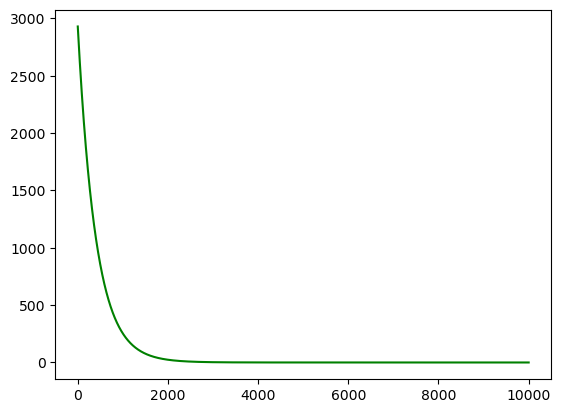

In [50]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 4 ex

In [51]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def _ensure_numpy(self, X):
        if isinstance(X, (pd.Series, pd.DataFrame)):
            return X.values.flatten()
        return np.asarray(X)
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

In [52]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.04992531975655815


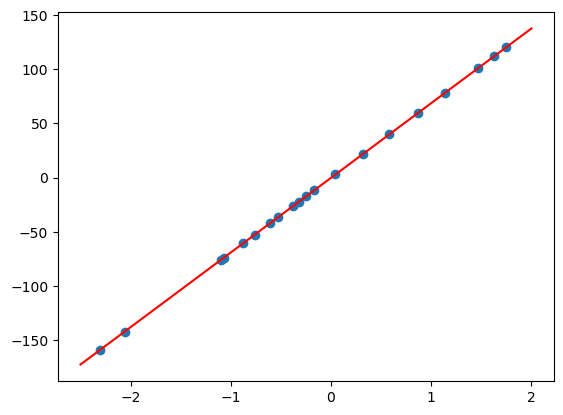

In [53]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

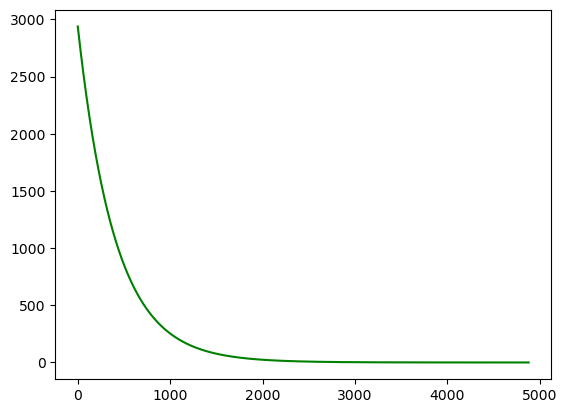

In [54]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 5 ex

In [55]:
hyp = Model(1000)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

Warning!
error after gradient descent: 253.13429386398096


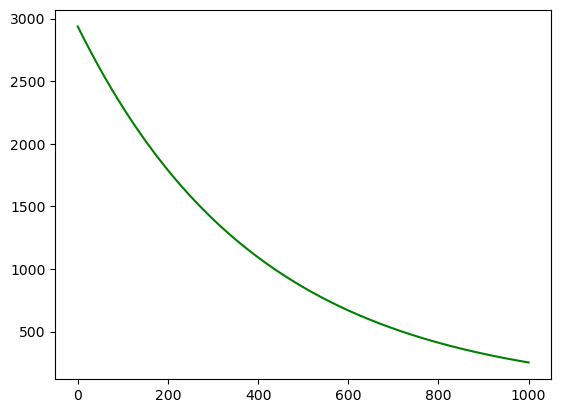

In [56]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 6 ex

In [65]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def _ensure_numpy(self, X):
        if isinstance(X, (pd.Series, pd.DataFrame)):
            return X.values.flatten()
        return np.asarray(X)
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=5, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if new_err > old_err: #для случая, когда мы выпрыгиваем или перепрыгиваем минимум при слишком большом альфа
                alpha /= 2
                self.__init__()
            elif old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

In [66]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.089312559124517e-05


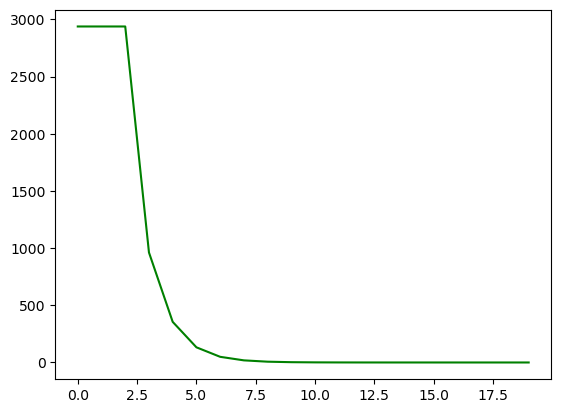

In [67]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

##### 7 Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [73]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def _ensure_numpy(self, X):
        if isinstance(X, (pd.Series, pd.DataFrame)):
            return X.values.flatten()
        return np.asarray(X)
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def paint(self, X, Y):
        X0 = np.linspace(X.min(), X.max(), 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X, Y)
        plt.plot(X0, Y0, 'r')
        plt.show()
    def fit(self, X, Y, alpha=5, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if new_err > old_err: #для случая, когда мы выпрыгиваем или перепрыгиваем минимум при слишком большом альфа
                alpha /= 2
                self.__init__()
            elif old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

error after gradient descent: 5.089312559124517e-05


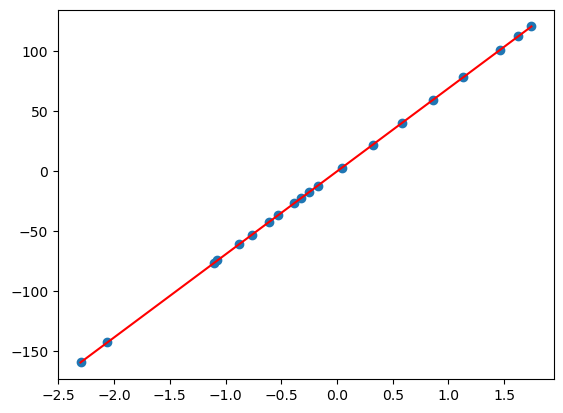

In [74]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
hyp.paint(x, y)

In [75]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def _ensure_numpy(self, X):
        if isinstance(X, (pd.Series, pd.DataFrame)):
            return X.values.flatten()
        return np.asarray(X)
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def paint(self, X, Y):
        X0 = np.linspace(-3, 2, 100)
        Y0 = self.predict(X0)
        plt.figure()
        plt.scatter(X, Y)
        plt.plot(X0, Y0, 'r')
        plt.show()
    def fit(self, X, Y, alpha=5, accuracy=0.01, max_steps=5000):
        X = self._ensure_numpy(X)
        Y = self._ensure_numpy(Y)
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if new_err > old_err: #для случая, когда мы выпрыгиваем или перепрыгиваем минимум при слишком большом альфа
                alpha /= 2
                self.__init__()
            elif old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

error after gradient descent: 5.089312559124517e-05


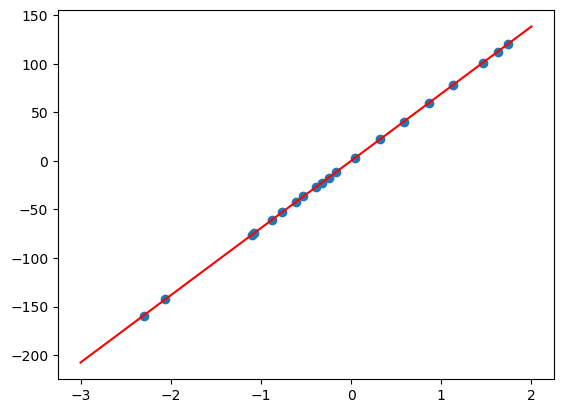

In [76]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
hyp.paint(x, y)